<a href="https://colab.research.google.com/github/matteo-orsi/MachineLearning/blob/main/challenges/challenge-00/challenge-00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge $0$


## 1. ***Data cleaning with Pandas***

Use the library `pandas` to load and clean the required dataset.

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

Obtain the data file

In [112]:
FFILE = './50_Startups.csv'
if os.path.isfile(FFILE):
    print("File already exists")
    if os.access(FFILE, os.R_OK):
        print ("File is readable")
    else:
        print ("File is not readable, removing it and downloading again")
        !rm FFILE
        !curl -o "50_Startups.csv" "https://raw.githubusercontent.com/alexdepremia/ML_IADA_UTs/refs/heads/main/challenge_0/50_Startups.csv"
else:
    print("Either the file is missing or not readable, download it")
    !curl -o "50_Startups.csv" "https://raw.githubusercontent.com/alexdepremia/ML_IADA_UTs/refs/heads/main/challenge_0/50_Startups.csv"

File already exists
File is readable


In [113]:
import pandas as pd

# Load the dataset using Pandas
data = pd.read_csv('50_Startups.csv')

# Extracting the features (independent variables) and labels (dependent variable)
# Features (X) are taken from all columns except the last two
features = data.iloc[:, :-2].values

# Labels (y) are taken from the third column (index 3, considering the 0-based index in Python)
labels = data.iloc[:, 3].values

df = pd.DataFrame(data)

In [114]:
labels

array(['New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Florida', 'Florida', 'New York',
       'California', 'Florida', 'New York', 'Florida', 'New York',
       'Florida', 'New York', 'California', 'Florida', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'California', 'Florida', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California'],
      dtype=object)

***Play with data***

In [115]:
df.shape

(50, 5)

In [116]:
df.replace(to_replace = 0.00, value = df.mean(axis=0, numeric_only=True), inplace=True)  # inject the mean of the column when value is 0
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


 **`df.replace()` function:**
   - This function is used to replace specific values within a DataFrame (`df`) with another value.
   - The parameters used are:
     - `to_replace=0.00`: This specifies the value in the DataFrame that needs to be replaced, in this case, `0.00`.
     - `value=df.mean(axis=0)`: This sets the replacement value for the matched condition. Here, `df.mean(axis=0)` calculates the mean for each column along the rows (axis=0) of the DataFrame `df`. The mean value for each column will replace the `0.00` values.
     - `inplace=True`: This parameter ensures that the modification is done directly on the original DataFrame (`df`) without creating a new DataFrame. If `inplace` is set to `True`, the original DataFrame is modified.

***Select two categories for binary classification***

In [117]:
df_sel=df[(df.State=="California") | (df.State=="Florida")]

In [118]:
df_sel.head() # column title and first rows of the dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60


In [119]:
df_sel.dtypes # type of each column

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


***Encode categorical data***

One-hot encoding of categorical feature _State_

One-Hot Encoding is a technique used in machine learning to handle categorical variables by transforming them into a format that can be easily utilized by algorithms.

Imagine having a categorical variable, such as colors: red, green, and blue. With One-Hot Encoding, each color becomes a new binary column. If an observation has a specific color, the column corresponding to that color will be set to 1, while the other columns will be set to 0.

For example:
- If you have categories "red", "green", "blue", and you want to encode them using One-Hot Encoding:
  - "red" becomes [1, 0, 0]
  - "green" becomes [0, 1, 0]
  - "blue" becomes [0, 0, 1]

This helps machine learning algorithms to understand and work with these categorical variables more effectively, as it doesn't impose an order or hierarchy among the categories but rather represents them in a form that the algorithm can interpret more efficiently.

In [120]:
df_one = pd.get_dummies(df_sel["State"], dtype=int)

In [121]:
df_one.head()

,California,Florida
1,1,0
2,0,1
4,0,1
6,1,0
7,0,1


In [122]:
# Constructing the final dataset for learning and prediction

# Concatenating two DataFrames 'df_one' and 'df_sel' along columns (axis=1)
df_fin = pd.concat((df_one, df_sel), axis=1)

# Dropping the column "Florida" from the dataset as it was not selected for the final model
df_fin = df_fin.drop(["Florida"], axis=1)

# Dropping the column "State" (assumed to be the original 'State' column) as it is not required in its original form
df_fin = df_fin.drop(["State"], axis=1)

# Renaming the column "California" to "State" as part of preparing the dataset for classification (1 for California, 0 for Florida)
df_fin = df_fin.rename(columns={"California": "State"})

# Displaying the initial rows of the modified final dataset
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,162597.70,151377.59,443898.53,191792.06
2,0,153441.51,101145.55,407934.54,191050.39
4,0,142107.34,91391.77,366168.42,166187.94
6,1,134615.46,147198.87,127716.82,156122.51
7,0,130298.13,145530.06,323876.68,155752.60


***Normalize***

Divide by the absolute value of the maximum so that features are in \[0, 1\]

In [123]:
def absolute_maximum_scale(series):
    """
    Scale each column in the DataFrame 'df_fin' by dividing the values by the absolute maximum value of that column.

    Args:
    series: A pandas Series or DataFrame column to be scaled.

    Returns:
    A scaled version of the input series with values ranging from -1 to 1 based on the maximum absolute value in the column.
    """
    return series / series.abs().max()

In [124]:
# Apply the 'absolute_maximum_scale' function to each column in the DataFrame 'df_fin'
for col in df_fin.columns:
    df_fin[col] = absolute_maximum_scale(df_fin[col])

In [125]:
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1.0,1.000000,0.828805,1.000000,1.000000
2,0.0,0.943688,0.553781,0.918982,0.996133
4,0.0,0.873981,0.500378,0.824892,0.866501
6,1.0,0.827905,0.805926,0.287716,0.814020
7,0.0,0.801353,0.796789,0.729619,0.812091


In [126]:
df_fin.shape

(33, 5)

***Classification***

Prepare the dataset:

In [127]:
y = df_fin["State"] # ground truth labels
X = df_fin.drop(["State"], axis=1) # datapoints features
# extract actual values from series
y = y.values
X = X.values

Train test split

$75\%$ of the data are in the training set, the remaining $25\%$ constitutes the test set.

In [128]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X represents the features (independent variables), and y represents the target (dependent variable).

# Using train_test_split function to create the training and testing sets
# X_train and y_train: Training features and labels
# X_test and y_test: Testing features and labels

# The 'test_size=0.25' parameter sets the proportion of the dataset to include in the test split. Here, 25% of the data is allocated to the test set.
# The 'random_state=0' parameter sets the random seed for reproducibility of the split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Train the Logistic Regression Model

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
# Creating a Logistic Regression model with specific parameters
# - 'random_state=0' ensures reproducibility by setting the random seed.
# - 'solver='lbfgs'' selects the optimization algorithm for the logistic regression.

LR = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

# Predicting the target variable (y) using the Logistic Regression model on the test set (X_test).
predictions = LR.predict(X_test)

# Calculating and rounding the accuracy score of the Logistic Regression model on the test set.
# The score is calculated by comparing the predicted values to the actual values (y_test).
accuracy = round(LR.score(X_test, y_test), 4)

***Plot results***

TN: 3, FP: 0, FN: 6, TP: 0


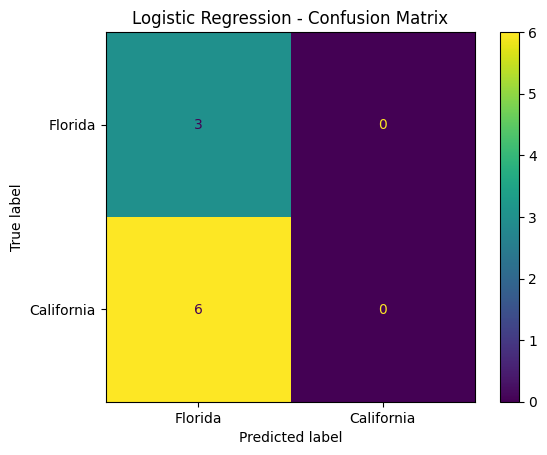

In [131]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

LR_cm = confusion_matrix(y_test, predictions)
LR_cm_display = ConfusionMatrixDisplay(confusion_matrix = LR_cm, display_labels = ["Florida", "California"])

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel().tolist()
print("TN: %d, FP: %d, FN: %d, TP: %d" % (tn, fp, fn, tp))


LR_cm_display.plot()
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

***Add regularization***

Implement from scratch the regularized logistic regression model (with all the regularization techniques seen during the course).

In [131]:
import numpy.linalg as LA
from numpy.linalg import inv

def sigmoidM(X, w):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    return 1 / (1 + np.exp(-np.matmul(X, w)))

def LogisticLoss(X, labels, w):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    return - np.mean(labels * np.log(sigmoidM(X, w)) + (1 - labels) * np.log(1 - sigmoidM(X, w)))

def LGradient(X, labels, w):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic
    """
    return (1 / np.shape(X)[0]) * np.matmul(np.transpose(X), (sigmoidM(X, w) - labels))

def GDLogistic(X, labels, iter, gamma):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    """
    n, d = X.shape  # The shape of X is a tuple (n, d)
    L = np.zeros(iter)       # Array to store loss values at each iteration
    w = np.random.uniform(0, 0.01, d)  # Initialize w with random values
    W = np.zeros((d, iter))  # Array to store weights at each iteration

    for i in range(iter):
        W[:, i] = w  # Store the current weight vector in the W array
        # Update the weight vector using gradient descent
        w = w - gamma * LGradient(X, labels, w)
        # Compute and store the logistic loss for the current weight vector
        L[i] = LogisticLoss(X, labels, w)

    return W, L

In [ ]:
def RidgeLogisticLoss(X, y, w, lam):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    y : array of float of dim n
        Vector containing the ground truth value of each data point
    w : array of float of dim d
        Weights of the fitted line1995
    lam : float
        Weight of the L2 penalty term
    """
    return LogisticLoss(X, y, w) + lam * LA.norm(w, 2) ** 2

def RidgeGradient(w, lam):
    """
    Parameters
    ----------
    w : array of float of dim d
        Weights of the fitted line
    lam : float
        Weight of the L2 penalty term
    """
    return 2 * lam * w

def GDRidgeLogistic(X, labels, iter, gamma, lam):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    lam : float
        Weight of the L2 penalty term
    """
    n, d = X.shape  # The shape of X is a tuple (n, d)
    L = np.zeros(iter)       # Array to store loss values at each iteration
    w = np.random.uniform(0, 0.01, d)  # Initialize w with random values
    W = np.zeros((d, iter))  # Array to store weights at each iteration

    for i in range(iter):
        W[:, i] = w  # Store the current weights in the W array
        # Update weights using gradient descent with both LGradient and Ridge components
        w = w - gamma * (LGradient(X, labels, w) + RidgeGradient(w, lam))
        # Calculate and store the current loss value with Ridge regularization
        L[i] = RidgeLogisticLoss(X, labels, w, lam)

    return W, L

In [ ]:
def LassoLogisticLoss(X, y, w, lam):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    y : array of float of dim n
        Vector containing the ground truth
    w : array of float of dim d
        Weights of the fitted line
    lam : float
        Weight of the L1 penalty term
    """
    return LogisticLoss(X, y, w) + lam * LA.norm(w, 1)

def LassoGradient(w, lam):
    """
    Parameters
    ----------
    w : array of float of dim d
        Weights of the fitted line
    lam : float
        Weight of the L1 penalty term
    """
    return lam * np.sign(w)

def GDLassoLogistic(X, labels, iter, gamma, lam):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning
    lam : float
        Weight of the L1 penalty term
    """
    n, d = X.shape  # The shape of X is a tuple (n, d)
    L = np.zeros(iter)       # Array to store loss values at each iteration
    w = np.random.uniform(0, 0.01, d)  # Initialize w with random values
    W = np.zeros((d, iter))  # Array to store weights at each iteration

    for i in range(iter):
        W[:, i] = w  # Store the current weights in the W array
        # Update weights using gradient descent with both LGradient and Lasso components
        w = w - gamma * (LGradient(X, labels, w) + LassoGradient(w, lam))
        # Calculate and store the current loss value with Lasso regularization
        L[i] = LassoLogisticLoss(X, labels, w, lam)

    return W, L

In [ ]:
def ElasticNetLogisticLoss(X, labels, w, lr, l):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    y : array of float of dim n
        Vector containing the ground truth value of each data point
    w : array of float of dim d
        Weights of the fitted line
    lr : float
        Convex combination parameter (controls L1 vs. L2 regularization)
    l : float
        Regularization strength parameter
    """
    return LogisticLoss(X, labels, w) + lr * l * LA.norm(w, 1) + (1 - lr) * l * LA.norm(w, 2)

# Elastic Net Loss Function
def ElasticNetSquareLoss(X, y, w, lr, l):
    """
    Calculate the Elastic Net loss for linear regression.

    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset.
    y : array of float of dim n
        Vector containing the ground truth value of each data point.
    w : array of float of dim d
        Weights of the fitted line.
    lr : float
        Convex combination parameter (controls L1 vs. L2 regularization).
    l : float
        Regularization strength parameter.

    Returns
    -------
    loss : float
        Elastic Net loss.
    """
    return SquareLoss(X, y, w) + lr * l * LA.norm(w, 1) + (1 - lr) * l * LA.norm(w, 2)

# Elastic Net Gradient Function
def ElasticNetGradient(X, y, w, lr, l, points):
    """
    Calculate the gradient for Elastic Net regularization.

    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset.
    y : array of float of dim n
        Vector containing the ground truth value of each data point.
    w : array of float of dim d
        Weights of the fitted line.
    lr : float
        Convex combination parameter (controls L1 vs. L2 regularization).
    l : float
        Regularization strength parameter.
    points : int
        Number of data points.

    Returns
    -------
    gradient : array of float of dim d
        Gradient of the Elastic Net regularization term.
    """
    return OLSGradient(X, y, w, points) + (1 - lr) * RidgeGradient(w, l) + lr * LassoGradient(w, l)

# Gradient Descent with Elastic Net Regularization
def GDElasticNet(X, y, lr, l, iter, gamma):
    """
    Perform Gradient Descent with Elastic Net regularization for linear regression.

    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset.
    y : array of float of dim n
        Vector containing the ground truth value of each data point.
    lr : float
        Convex combination parameter (controls L1 vs. L2 regularization).
    l : float
        Regularization strength parameter.
    iter : int
        Number of GD iterations.
    gamma : float
        Learning rate.

    Returns
    -------
    W : array of float of dim d x iter
        Weight vectors at each iteration.
    L : array of float of dim iter
        Loss values at each iteration.
    """
    points = X.shape[0]
    d = X.shape[1]
    W = np.zeros((d, iter))
    L = np.zeros(iter)
    w = np.random.normal(0, 0.1, d)
    for i in range(iter):
        W[:, i] = w
        w = w - gamma * ElasticNetGradient(X, y, w, lr, l, points)
        L[i] = ElasticNetSquareLoss(X, y, w, lr, l)
    return W, L

***Model assessment***

Given true and predicted values, compute the most common classification metrics to assess the quality of your predictions.

In [132]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = LR.predict(X_test)

target_names = ['California', 'Florida']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Repeat the previous task for regularized logistic regression and compare the results.

***ROC curve***

Implement a function for producing the Receiver Operating Characteristic (ROC) curve.

Given true and predicted values, plot the ROC curve using your implemented function.